## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>

This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).

The dataset we use for this part is the [STL10 dataset](https://cs.stanford.edu/~acoates/stl10/) which consists of $5,000$ training images of airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck; each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:

1. `DatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training.
2. `BaseImageClassifier`: A base class image classfication, which is basically a CNN model.

*Note*: You may need to install the package `imutils` if you have not installed yet

Firstly, we need to run the following cells to load required packages.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from A1_S2_2023 import DatasetManager, BaseImageClassifier

Note that the class `DatasetManager` has attributes related to *the training, validation, and testing sets*. You can use them in training your developped models in the sequel.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incompleteSQI1JN/stl10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incompleteSQI1JN/stl10-test.tfrecord*...:   0%|          | 0/8…

Generating unlabelled examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incompleteSQI1JN/stl10-unlabelled.tfrecord*...:   0%|         …

Dataset stl10 downloaded and prepared to /root/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.


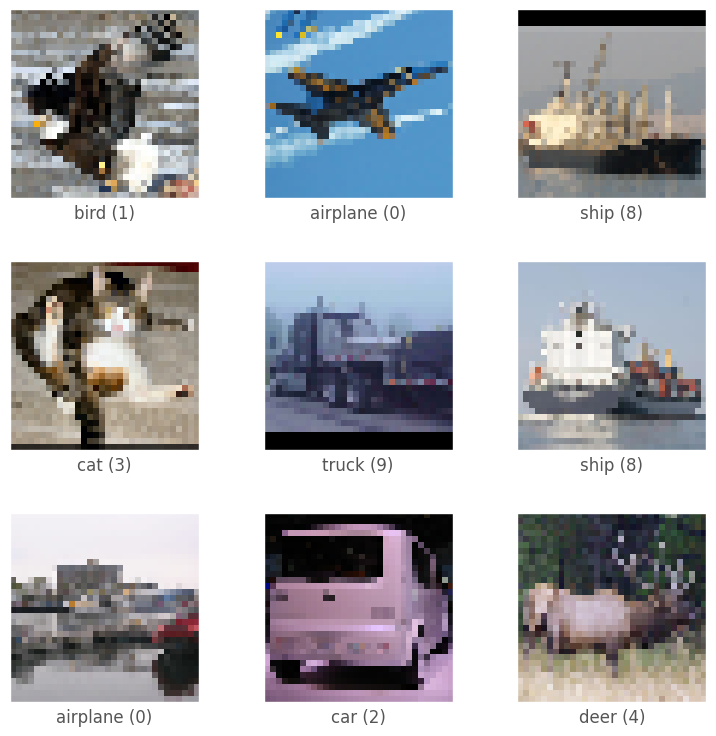

In [ ]:
dataset_name = 'stl10'
# Choose path to store dataset
data_dir = '{}/tensorflow_datasets'.format(os.path.expanduser('~'))

data_manager = DatasetManager(dataset_name, data_dir)
data_manager.load_dataset()
data_manager.preprocess_dataset()
data_manager.show_examples()

In [ ]:
# Choose a random example
import random
num_examples = tf.data.experimental.cardinality(data_manager.ds_train).numpy()
random_index = random.randint(0, num_examples - 1)
example = next(iter(data_manager.ds_train.skip(random_index).take(1)))[0]

# Print the shape and value of the image
print("Image shape:", example.shape)
print("Image value range:", example.numpy().min(), "to", example.numpy().max())

Image shape: (32, 32, 3)
Image value range: 0.0 to 1.0


In [ ]:
# Check the number of examples in each dataset
print(tf.data.experimental.cardinality(data_manager.ds_train))
print(tf.data.experimental.cardinality(data_manager.ds_val))
print(tf.data.experimental.cardinality(data_manager.ds_test))

tf.Tensor(4500, shape=(), dtype=int64)
tf.Tensor(500, shape=(), dtype=int64)
tf.Tensor(8000, shape=(), dtype=int64)


We now use **BaseImageClassifier** built in the **A1_S2_2023.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated with.

In [ ]:
network1 = BaseImageClassifier(name='network1',
                       num_classes=10,
                       optimizer='sgd',
                       batch_size=128,
                       num_epochs=20,
                       learning_rate=0.001)

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **A1_S2_2023.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [ ]:
network1.build_cnn()
network1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d_9 (Averag  (None, 16, 16, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_10 (Avera  (None, 8, 8, 64)         0         
 gePooling2D)                                        

In [ ]:
x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = network1.optimize_data_pipeline(data_manager.ds_val, batch_size=32)
network1.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 17s 38ms/step - loss: 2.2958 - accuracy: 0.1180 - val_loss: 2.2826 - val_accuracy: 0.1220
Epoch 2/20
141/141 [==============================] - 1s 5ms/step - loss: 2.2597 - accuracy: 0.1558 - val_loss: 2.2006 - val_accuracy: 0.1900
Epoch 3/20
141/141 [==============================] - 1s 5ms/step - loss: 2.1436 - accuracy: 0.2109 - val_loss: 2.0913 - val_accuracy: 0.2420
Epoch 4/20
141/141 [==============================] - 1s 5ms/step - loss: 2.0369 - accuracy: 0.2671 - val_loss: 1.9780 - val_accuracy: 0.3020
Epoch 5/20
141/141 [==============================] - 1s 5ms/step - loss: 1.9279 - accuracy: 0.3024 - val_loss: 1.8852 - val_accuracy: 0.3300
Epoch 6/20
141/141 [==============================] - 1s 5ms/step - loss: 1.8568 - accuracy: 0.3282 - val_loss: 1.8274 - val_accuracy: 0.3440
Epoch 7/20
141/141 [==============================] - 1s 5ms/step - loss: 1.7877 - accuracy: 0.3533 - val_loss: 1.7716 - val_accuracy: 0.3620
Epoc

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training.

In [ ]:
x_test_batch = network1.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
network1.compute_accuracy(x_test_batch)

250/250 [==============================] - 5s 19ms/step - loss: 1.5633 - accuracy: 0.4386
loss: 1.563307523727417
accuracy: 0.4386250078678131


Below shows how you can inspect the training progress.

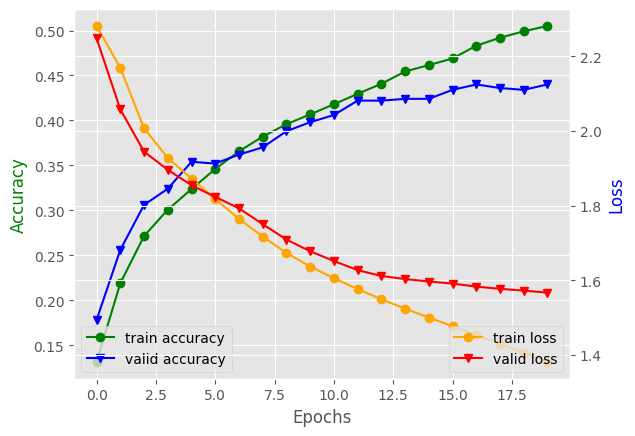

In [ ]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [ ]:
num_samples = 25
sample_dataset = data_manager.ds_test.take(num_samples)
network1.predict(sample_dataset.batch(num_samples), data_manager.ds_info)

1/1 [==============================] - 0s 320ms/step
Sample 1: Predicted label - ship
Sample 2: Predicted label - monkey
Sample 3: Predicted label - cat
Sample 4: Predicted label - car
Sample 5: Predicted label - ship
Sample 6: Predicted label - monkey
Sample 7: Predicted label - deer
Sample 8: Predicted label - horse
Sample 9: Predicted label - airplane
Sample 10: Predicted label - deer
Sample 11: Predicted label - deer
Sample 12: Predicted label - ship
Sample 13: Predicted label - horse
Sample 14: Predicted label - truck
Sample 15: Predicted label - horse
Sample 16: Predicted label - cat
Sample 17: Predicted label - deer
Sample 18: Predicted label - airplane
Sample 19: Predicted label - truck
Sample 20: Predicted label - ship
Sample 21: Predicted label - dog
Sample 22: Predicted label - horse
Sample 23: Predicted label - truck
Sample 24: Predicted label - truck
Sample 25: Predicted label - airplane


Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

1/1 [==============================] - 0s 85ms/step


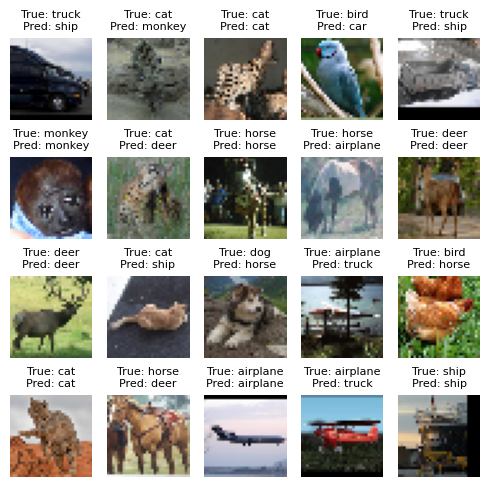

In [ ]:
num_samples = 20
sample_dataset = data_manager.ds_test.take(num_samples)
network1.plot_predictions(sample_dataset, data_manager.ds_info, num_samples=num_samples, grid_shape=(4, 5))

### <span style="color:#0b486b">Question 3.1: Observe the learning curve</span>
After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

**The model wasn't really able to learn well, reaching an accuracy of approximately 50% training accuracy only. One possible reason could be due to the presence of multiple average pooling layers, which cause the images to lose a lot of its features and ultimately causing the training accuracy to not perform well in general. A potential solution could be to only perform average pooling at the end of the architecture to preserve the image's features as much as possible while running through the CNN layers. Another micro improvement is to provide a Dropout layer at the very end as well to increase computational capabilities since we are able to drop neurons that are not required.**


We can see that in this model, although the both the training and validating accuracy increases steadily in a curve, the overall training accuracy is barely over 50%. The model did learn well progressively but it is not enough given that the accuracy is a mere 50%. A possible way to potentially improve the model is to fine tune the parameters put into the model (e.g. batch size, learning rate, etc.)

**For questions 3.2 to 3.9**, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters which you can find in function `__init__()` for the class `BaseImageClassifier`:

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout.
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization.
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="=Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, activations

tf.random.set_seed(3181)

### <span style="color:#0b486b">Question 3.2: Define your CNN</span>

Write the code of the `YourModel` class here. Note that this class will be inherited from the `BaseImageClassifier` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm=None,
                 is_augmentation=False,
                 activation_func='relu',
                 optimizer='adam',
                 use_skip=True,
                 batch_size=10,
                 num_epochs=20,
                 learning_rate=0.0001,
                 verbose=True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation,
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)

    def build_cnn(self):
        # INSERT YOUR CODE HERE

        # Input Layer
        X = tf.keras.layers.Input(shape=(self.width, self.height, self.depth))

        # Size of Architecture depends on number of blocks provided as argument
        for i in range(self.num_blocks):
            h1 = layers.Conv2D(self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(X)
            h2 = layers.BatchNormalization()(h1)
            h3 = layers.Activation(self.activation_func)(h2)
            h4 = layers.Conv2D(self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h3)
            h5 = layers.BatchNormalization()(h4)

            # If architecture adopts skip connection, concatenate the output of the last layer before concatenation (Batch Norm) with the first layer
            if self.use_skip:
                h5 = layers.Concatenate()([h1, h5])

            h6 = layers.Activation(self.activation_func)(h5)
            h7 = layers.AveragePooling2D(strides=(2,2), padding='same')(h6)
            h8 = layers.Dropout(rate=self.drop_rate)(h7)

        # Flatten and Output the results
        h9 = layers.Flatten()(h8)
        h10 = layers.Dense(self.num_classes, activation='softmax')(h9)

        self.model = tf.keras.Model(inputs= X, outputs=h10)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### <span style="color:#0b486b">Question 3.3: Experiment with skip connection</span>
Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

.....




**From here we actually see that the case with skip connection works better, but from both of those models, we can see one interesting fact. between 7.5 and 10 epochs, the margin of the training accuracy and loss increases as if its doubled. Other than that, the model is overfitting since when the model is being validated, the accuracy is quite low despite the training accuracy being very high, to the point where it almost reaches 100% accuracy. This is also manifested when we try to evaluate the model against the testing set**

In [ ]:
our_network_skip = YourModel(name='network1',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=3,
                      drop_rate=0.0,
                      batch_norm=True,
                      use_skip=True,
                      optimizer='sgd',
                      batch_size=128,
                      learning_rate=0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 32, 32, 128)  3584        ['input_1[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 32, 32, 128)  512        ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_4 (Activation)      (None, 32, 32, 128)  0           ['batch_normalization_4[0][0]

In [ ]:
x_train_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

In [ ]:
our_network_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 14s 27ms/step - loss: 2.0474 - accuracy: 0.3478 - val_loss: 2.7441 - val_accuracy: 0.1040
Epoch 2/20
141/141 [==============================] - 2s 11ms/step - loss: 1.4610 - accuracy: 0.5224 - val_loss: 2.4824 - val_accuracy: 0.1460
Epoch 3/20
141/141 [==============================] - 1s 10ms/step - loss: 1.1723 - accuracy: 0.6107 - val_loss: 1.8029 - val_accuracy: 0.3460
Epoch 4/20
141/141 [==============================] - 2s 11ms/step - loss: 0.9475 - accuracy: 0.6791 - val_loss: 1.9053 - val_accuracy: 0.4000
Epoch 5/20
141/141 [==============================] - 2s 11ms/step - loss: 0.7090 - accuracy: 0.7558 - val_loss: 1.7317 - val_accuracy: 0.4440
Epoch 6/20
141/141 [==============================] - 2s 11ms/step - loss: 0.5612 - accuracy: 0.7971 - val_loss: 2.2543 - val_accuracy: 0.4840
Epoch 7/20
141/141 [==============================] - 1s 11ms/step - loss: 0.5148 - accuracy: 0.8149 - val_loss: 2.4659 - val_accuracy: 0.430

In [ ]:
x_test_batch = our_network_skip.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
our_network_skip.compute_accuracy(x_test_batch)

250/250 [==============================] - 5s 20ms/step - loss: 1.8253 - accuracy: 0.5502
loss: 1.8252928256988525
accuracy: 0.5502499938011169


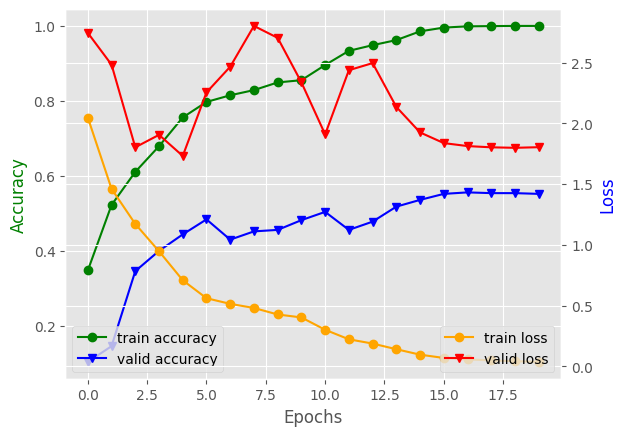

In [ ]:
our_network_skip.plot_progress()

In [ ]:
our_network_no_skip = YourModel(name='network1',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=3,
                      drop_rate=0.0,
                      batch_norm=True,
                      use_skip=False,
                      optimizer='sgd',
                      batch_size=128,
                      learning_rate=0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                          

In [ ]:
x_train_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

In [ ]:
our_network_no_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 4s 21ms/step - loss: 2.0846 - accuracy: 0.3471 - val_loss: 2.9553 - val_accuracy: 0.0880
Epoch 2/20
141/141 [==============================] - 1s 9ms/step - loss: 1.4397 - accuracy: 0.5278 - val_loss: 2.9530 - val_accuracy: 0.0960
Epoch 3/20
141/141 [==============================] - 1s 9ms/step - loss: 1.1208 - accuracy: 0.6187 - val_loss: 1.8581 - val_accuracy: 0.3760
Epoch 4/20
141/141 [==============================] - 1s 9ms/step - loss: 0.8917 - accuracy: 0.6971 - val_loss: 1.7535 - val_accuracy: 0.4200
Epoch 5/20
141/141 [==============================] - 1s 9ms/step - loss: 0.7197 - accuracy: 0.7507 - val_loss: 1.8520 - val_accuracy: 0.4860
Epoch 6/20
141/141 [==============================] - 1s 9ms/step - loss: 0.5810 - accuracy: 0.7931 - val_loss: 2.5128 - val_accuracy: 0.4780
Epoch 7/20
141/141 [==============================] - 1s 10ms/step - loss: 0.5326 - accuracy: 0.8076 - val_loss: 2.4068 - val_accuracy: 0.4320
Epoc

In [ ]:
x_test_batch = our_network_no_skip.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
our_network_no_skip.compute_accuracy(x_test_batch)

250/250 [==============================] - 4s 15ms/step - loss: 1.8411 - accuracy: 0.5468
loss: 1.8410896062850952
accuracy: 0.546750009059906


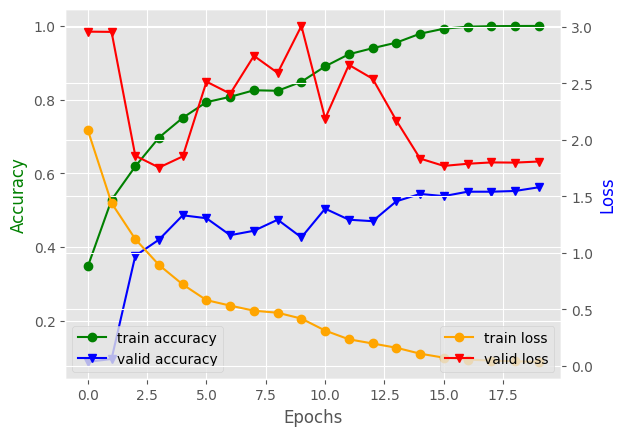

In [ ]:
our_network_no_skip.plot_progress()

### <span style="color:#0b486b">Question 3.4: Tune hyperparameters with grid search</span>

Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# REPORT THE BEST PARAMETERS AND THE TESTING ACCURACY HERE*

After running all parameter values against the model, we finally obtain the best model with the parameters below:
- Number of Blocks: 3
- Skip Connection: True
- Learning Rate: 0.001

This model would yield an accuracy of approximately 55.4%

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
num_blocks = [2,3,4]
use_skip = [True,False]
learning_rate = [0.001, 0.0001]
best_accuracy = -10**99
best_num_blocks = None
best_skip = None
best_learning_rate = None
for block in num_blocks:
  for skip in use_skip:
    for lr in learning_rate:
      print(f"Currently using following params: {block} number of blocks, skip set to {skip}, Using learning rate of {lr}")

      # Initialise and Build Model for every iteration
      grid_search_model = YourModel(name='network_n',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=block,
                      drop_rate=0.0,
                      batch_norm=True,
                      use_skip=skip,
                      optimizer='sgd',
                      learning_rate=lr,
                      verbose=False)
      grid_search_model.build_cnn()

      # Preprocess Training and Validation Dataset to fit the appropriate shape for model training
      x_train_batch = grid_search_model.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
      x_val_batch = grid_search_model.optimize_data_pipeline(data_manager.ds_val, batch_size=32)

      # Train Model
      grid_search_model.fit(x_train_batch, x_val_batch, num_epochs=20)

      # Preprocess Testing Dataset and Evaluate
      x_test_batch = grid_search_model.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
      loss, accuracy = grid_search_model.model.evaluate(x_test_batch)

      # Find out whether current parameters yield a better accuracy
      if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_num_blocks = block
        best_skip = skip
        best_learning_rate = lr
print(f"Best set of params would be using {best_num_blocks} blocks having set the skip function to {best_skip} and the learning rate to be {best_learning_rate}. This yields an accuracy of {best_accuracy}")

Currently using following params: 2 number of blocks, skip set to True, Using learning rate of 0.001
250/250 [==============================] - 4s 16ms/step - loss: 1.7378 - accuracy: 0.5263
Currently using following params: 2 number of blocks, skip set to True, Using learning rate of 0.0001
250/250 [==============================] - 4s 15ms/step - loss: 1.3188 - accuracy: 0.5268
Currently using following params: 2 number of blocks, skip set to False, Using learning rate of 0.001
250/250 [==============================] - 5s 18ms/step - loss: 1.6478 - accuracy: 0.5426
Currently using following params: 2 number of blocks, skip set to False, Using learning rate of 0.0001
250/250 [==============================] - 7s 25ms/step - loss: 1.3365 - accuracy: 0.5128
Currently using following params: 3 number of blocks, skip set to True, Using learning rate of 0.001
250/250 [==============================] - 4s 15ms/step - loss: 1.8559 - accuracy: 0.5477
Currently using following params: 3 numbe

### <span style="color:#0b486b">Question 3.5: Apply data augmentation</span>

We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [ ]:
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation,
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)


    def build_cnn(self):
        # INSERT YOUR CODE HERE
        X = tf.keras.layers.Input(shape=(self.width, self.height, self.depth))
        for i in range(self.num_blocks):
            h1 = layers.Conv2D(self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(X)
            h2 = layers.BatchNormalization()(h1)
            h3 = layers.Activation(self.activation_func)(h2)
            h4 = layers.Conv2D(self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h3)
            h5 = layers.BatchNormalization()(h4)
            if self.use_skip:
                h5 = tf.keras.layers.Concatenate()([h1, h5])
            h6 = layers.Activation(self.activation_func)(h5)
            h7 = layers.AveragePooling2D(strides=(2,2), padding='same')(h6)
            h8 = layers.Dropout(rate=self.drop_rate)(h7)
        h9 = layers.Flatten()(h8)
        h10 = layers.Dense(self.num_classes, activation='softmax')(h9)
        self.model = tf.keras.Model(inputs= X, outputs=h10)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def fit(self, data_manager, batch_size=None, num_epochs=None):
        # INSERT YOUR CODE HERE
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs

        if self.is_augmentation:

          # If Data Augmentation is required, extract x_train, y_train, x_val and y_val
          datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.3, height_shift_range=0.3)
          x_train, y_train = self.dataset_to_numpy(data_manager.ds_train, batch_size=32)
          x_val, y_val = self.dataset_to_numpy(data_manager.ds_val, batch_size=32)

          # Fit the augmentation changes to x_train
          datagen.fit(x_train)

          # Batch the augmented dataset and train the model
          it = datagen.flow(x_train, batch_size=batch_size)
          steps = len(x_train) // batch_size
          early_checkpoint = EarlyStopping(patience=3, monitor='val_loss', mode='min')
          callbacks = [early_checkpoint]
          self.history = self.model.fit(x_train, y_train, epochs=num_epochs, steps_per_epoch=steps, validation_data=(x_val, y_val), callbacks=callbacks)
        else:

          # Train the model without any augmentation
          x_train_batch = self.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
          x_val_batch = self.optimize_data_pipeline(data_manager.ds_val, batch_size=32)
          early_checkpoint = EarlyStopping(patience=3, monitor='val_loss', mode='min')
          callbacks = [early_checkpoint]
          self.history = self.model.fit(x_train_batch, epochs=num_epochs, validation_data=x_val_batch, callbacks=callbacks)

    def dataset_to_numpy(self, dataset, batch_size=None):
        x_dataset = []
        y_dataset = []

        # Preprocess data and convert it to numpy iterator
        batch_data = self.optimize_data_pipeline(dataset, batch_size=32)
        batch_data_numpy = batch_data.as_numpy_iterator()

        # For every "blob" of data in the iterator, extract the x and y matrices and cast their data types to list for consistency
        for single_data in batch_data_numpy:
            x_dataset_t, y_dataset_t = single_data
            if x_dataset == []:
              x_dataset = list(x_dataset_t)
            else:
                x_dataset += list(x_dataset_t)
            if y_dataset == []:
              y_dataset = list(y_dataset_t)
            else:
              y_dataset += list(y_dataset_t)

        # Convert both matrices to numpy datasets
        x_dataset = np.array(x_dataset)
        y_dataset = np.array(y_dataset)

        return x_dataset, y_dataset

    def call(self, x):
        return self.model(x)


### <span style="color:#0b486b">Question 3.6: Observe model performance with data augmentation</span>

Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and not using it.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

**For this model, we can see that the data augmentation does indeed improve the accuracy of the model. With the help of early stopping, we can see that the model with data augmentation was able to train better early one before stopping while the model without data augmentation has not picked up its performance during the early phase and had to come to an early stop while that's happening**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

with_data_aug = YourModel(name='network_n',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=best_num_blocks,
                      drop_rate=0.0,
                      batch_norm=True,
                      is_augmentation=True,
                      use_skip=best_skip,
                      optimizer='sgd',
                      batch_size=128,
                      learning_rate=best_learning_rate)

with_data_aug.build_cnn()
with_data_aug.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
140/140 [==============================] - 6s 30ms/step - loss: 2.7898 - accuracy: 0.3190 - val_loss: 3.3295 - val_accuracy: 0.1160
Epoch 2/20
140/140 [==============================] - 4s 25ms/step - loss: 1.8325 - accuracy: 0.5077 - val_loss: 3.1134 - val_accuracy: 0.2040
Epoch 3/20
140/140 [==============================] - 4s 25ms/step - loss: 1.2238 - accuracy: 0.6243 - val_loss: 2.4220 - val_accuracy: 0.2900
Epoch 4/20
140/140 [==============================] - 4s 26ms/step - loss: 0.7365 - accuracy: 0.7558 - val_loss: 1.8088 - val_accuracy: 0.4700
Epoch 5/20
140/140 [==============================] - 4s 25ms/step - loss: 0.4247 - accuracy: 0.8556 - val_loss: 1.9552 - val_accuracy: 0.4480
Epoch 6/20
140/140 [==============================] - 4s 25ms/step - loss: 0.2900 - accuracy: 0.9011 - val_loss: 1.8367 - val_accuracy: 0.5140
Epoch 7/20
140/140 [==============================] - 4s 26ms/step - loss: 0.1581 - accuracy: 0.9602 - val_loss: 1.8045 - val_accuracy: 0.5360

In [ ]:
x_test_batch = with_data_aug.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
with_data_aug.compute_accuracy(x_test_batch)

250/250 [==============================] - 4s 16ms/step - loss: 1.7198 - accuracy: 0.5592
loss: 1.7197911739349365
accuracy: 0.559249997138977


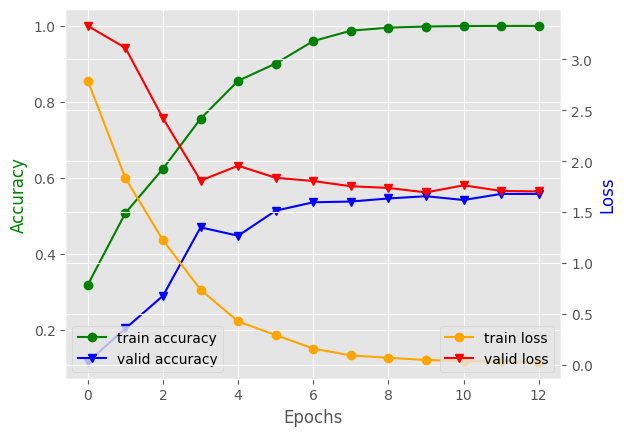

In [ ]:
with_data_aug.plot_progress()

In [ ]:
without_data_aug = YourModel(name='network_n',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=best_num_blocks,
                      drop_rate=0.0,
                      batch_norm=True,
                      is_augmentation = False,
                      use_skip=best_skip,
                      optimizer='sgd',
                      batch_size=128,
                      learning_rate=best_learning_rate)

without_data_aug.build_cnn()
without_data_aug.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 4s 25ms/step - loss: 2.6753 - accuracy: 0.3300 - val_loss: 3.3364 - val_accuracy: 0.1120
Epoch 2/20
141/141 [==============================] - 3s 23ms/step - loss: 1.8413 - accuracy: 0.5142 - val_loss: 5.1011 - val_accuracy: 0.1180
Epoch 3/20
141/141 [==============================] - 3s 22ms/step - loss: 1.6688 - accuracy: 0.5798 - val_loss: 5.3797 - val_accuracy: 0.1080
Epoch 4/20
141/141 [==============================] - 3s 22ms/step - loss: 1.5001 - accuracy: 0.6296 - val_loss: 2.4960 - val_accuracy: 0.4260
Epoch 5/20
141/141 [==============================] - 3s 22ms/step - loss: 1.2362 - accuracy: 0.6829 - val_loss: 3.8327 - val_accuracy: 0.3700
Epoch 6/20
141/141 [==============================] - 3s 22ms/step - loss: 0.8309 - accuracy: 0.7593 - val_loss: 3.3558 - val_accuracy: 0.4500
Epoch 7/20
141/141 [==============================] - 3s 22ms/step - loss: 0.6774 - accuracy: 0.7849 - val_loss: 4.7490 - val_accuracy: 0.4120

In [ ]:
x_test_batch = without_data_aug.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
without_data_aug.compute_accuracy(x_test_batch)

250/250 [==============================] - 5s 21ms/step - loss: 4.5679 - accuracy: 0.4029
loss: 4.567938327789307
accuracy: 0.40287500619888306


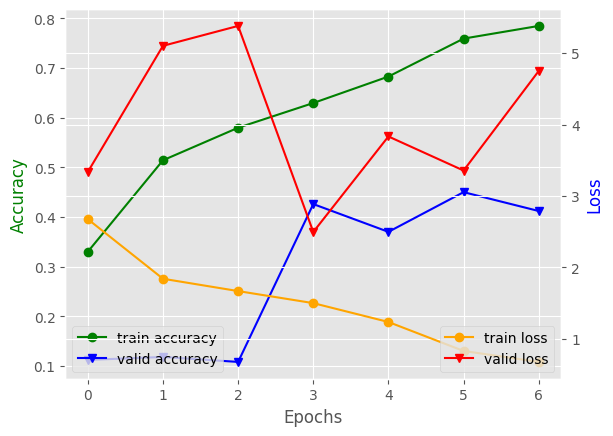

In [ ]:
without_data_aug.plot_progress()

### <span style="color:#0b486b">Question 3.7: Explore data mixup technique</span>

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

**In this section, we try out data mixup on 2 scenarios where we have a model with (i) data mixup and augmentation and (ii) data mixup and no augmentation. We can see that the model with mixup but no augmentation yields a better performance of 47.7% accuracy. but one interesting observation is that the validation of **


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation,
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)

    def build_cnn(self):
        # INSERT YOUR CODE HERE
        X = layers.Input(shape=(self.width, self.height, self.depth))
        for i in range(self.num_blocks):
            h1 = layers.Conv2D(self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(X)
            h2 = layers.BatchNormalization()(h1)
            h3 = layers.Activation(self.activation_func)(h2)
            h4 = layers.Conv2D(self.feature_maps[i], kernel_size=(3,3), strides=(1,1), padding='same')(h3)
            h5 = layers.BatchNormalization()(h4)
            if self.use_skip:
                h5 = tf.keras.layers.Concatenate()([h1, h5])
            h6 = layers.Activation(self.activation_func)(h5)
            h7 = layers.AveragePooling2D(strides=(2,2), padding='same')(h6)
            h8 = layers.Dropout(rate=self.drop_rate)(h7)
        h9 = layers.Flatten()(h8)
        h10 = layers.Dense(self.num_classes, activation='softmax')(h9)
        self.model = tf.keras.Model(inputs= X, outputs=h10)
        self.model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    def fit(self, data_manager, batch_size=None, num_epochs=None):
        # INSERT YOUR CODE HERE
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs

        # Create two copies of the x and y matrices of the dataset
        x_train1, y_train1 = self.dataset_to_numpy(data_manager.ds_train, batch_size=batch_size)
        x_train2, y_train2 = self.dataset_to_numpy(data_manager.ds_train, batch_size=batch_size)

        # Convert both y matrices to one hot vectors for data mixup purposes
        y_train_one_hot1 = np.zeros((y_train1.size, y_train1.max() + 1))
        y_train_one_hot1[np.arange(y_train1.size), y_train1] = 1

        y_train_one_hot2 = np.zeros((y_train2.size, y_train2.max() + 1))
        y_train_one_hot2[np.arange(y_train2.size), y_train2] = 1

        # Perform data mixup of both the x and y datasets
        x_train_mix, y_train_mix = self.mix_up(x_train1, x_train2, y_train_one_hot1, y_train_one_hot2, batch_size)

        # Extract x and y matrices from the validation dataset
        x_val, y_val = self.dataset_to_numpy(data_manager.ds_val, batch_size=batch_size)

        # Convert y matrix to one hot vectors for data mixup purposes
        y_val_one_hot = np.zeros((y_val.size, y_val.max() + 1))
        y_val_one_hot[np.arange(y_val.size), y_val] = 1

        # Train Model
        early_checkpoint = EarlyStopping(patience=3, monitor='val_loss', mode='min')
        callbacks = [early_checkpoint]
        self.history = self.model.fit(x_train_mix, y_train_mix, epochs=num_epochs, validation_data=(x_val, y_val_one_hot), callbacks=callbacks)

    def sample_beta_distribution(self, size, concentration_0=0.2, concentration_1=0.2):
        gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
        gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
        return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


    def mix_up(self, images_one, images_two, labels_one, labels_two, alpha=0.2):
        # Sample lambda and reshape it to do the mixup
        l = self.sample_beta_distribution(images_one.shape[0], alpha, alpha)
        x_l = tf.reshape(l, (images_one.shape[0], 1, 1, 1))
        y_l = tf.reshape(l, (labels_one.shape[0], 1))

        # Perform mixup on both images and labels by combining a pair of images/labels
        # (one from each dataset) into one image/label
        images = images_one * x_l + images_two * (1 - x_l)
        labels = labels_one * y_l + labels_two * (1 - y_l)
        return images, labels

    def dataset_to_numpy(self, dataset, batch_size=None):
        x_dataset = []
        y_dataset = []

        # Preprocess data and convert it to numpy iterator
        batch_data = self.optimize_data_pipeline(dataset, batch_size=32)
        batch_data_numpy = batch_data.as_numpy_iterator()

        # For every "blob" of data in the iterator, extract the x and y matrices and cast their data types to list for consistency
        for single_data in batch_data_numpy:
            x_dataset_t, y_dataset_t = single_data
            if x_dataset == []:
              x_dataset = list(x_dataset_t)
            else:
                x_dataset += list(x_dataset_t)
            if y_dataset == []:
              y_dataset = list(y_dataset_t)
            else:
              y_dataset += list(y_dataset_t)

        # Convert both matrices to numpy datasets
        x_dataset = np.array(x_dataset)
        y_dataset = np.array(y_dataset)

        return x_dataset, y_dataset

    def call(self, x):
        return self.model(x)


In [ ]:
with_data_mixup = YourModel(name='network_n',
                      feature_maps=32,
                      num_classes=data_manager.n_classes,
                      num_blocks=best_num_blocks,
                      drop_rate=0.0,
                      batch_norm=True,
                      is_augmentation=False,
                      use_skip=best_skip,
                      optimizer='sgd',
                      learning_rate=best_learning_rate)

with_data_mixup.build_cnn()
with_data_mixup.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 4s 24ms/step - loss: 2.9099 - accuracy: 0.3171 - val_loss: 2.9982 - val_accuracy: 0.1140
Epoch 2/20
141/141 [==============================] - 3s 22ms/step - loss: 1.8677 - accuracy: 0.5067 - val_loss: 3.4029 - val_accuracy: 0.1220
Epoch 3/20
141/141 [==============================] - 3s 23ms/step - loss: 1.2013 - accuracy: 0.6340 - val_loss: 2.9795 - val_accuracy: 0.2180
Epoch 4/20
141/141 [==============================] - 3s 22ms/step - loss: 0.7051 - accuracy: 0.7622 - val_loss: 1.7205 - val_accuracy: 0.4500
Epoch 5/20
141/141 [==============================] - 3s 22ms/step - loss: 0.4051 - accuracy: 0.8609 - val_loss: 1.8240 - val_accuracy: 0.4720
Epoch 6/20
141/141 [==============================] - 3s 22ms/step - loss: 0.3071 - accuracy: 0.8980 - val_loss: 1.9552 - val_accuracy: 0.4640
Epoch 7/20
141/141 [==============================] - 3s 23ms/step - loss: 0.1665 - accuracy: 0.9580 - val_loss: 1.8574 - val_accuracy: 0.4980

In [ ]:
x_test, y_test = with_data_mixup.dataset_to_numpy(data_manager.ds_test, batch_size=32)
y_train_one_hot = np.zeros((y_test.size, y_test.max() + 1))
y_train_one_hot[np.arange(y_test.size), y_test] = 1
batch_set = tf.data.Dataset.from_tensor_slices((x_test, y_train_one_hot))
batch_set = batch_set.batch(32)
with_data_mixup.compute_accuracy(batch_set)

250/250 [==============================] - 3s 9ms/step - loss: 1.7877 - accuracy: 0.5188
loss: 1.787746548652649
accuracy: 0.518750011920929


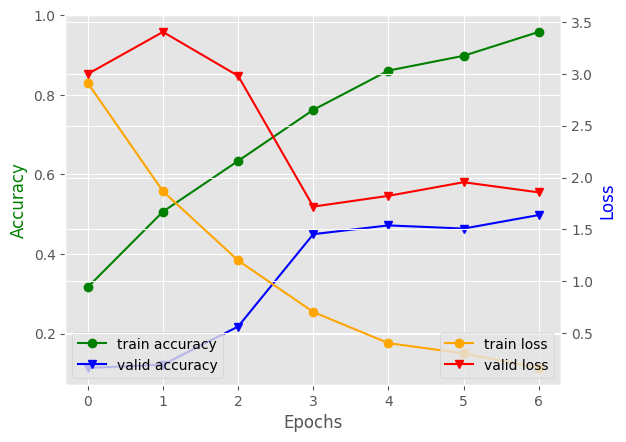

In [ ]:
with_data_mixup.plot_progress()

### <span style="color:#0b486b">Question 3.8: Attack your model</span>

Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Across all our models, we can see that the best model will be the model that utilized data augmentation `with_data_aug`, yielding an accuracy of about 60%. Therefore, let us try to attack the model with the PGD, MIM, and FGSM attacks

In [ ]:
import copy
import math

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
def fgsm_attack(model, input_image, input_label=None,
               epsilon=0.3,
               clip_value_min=0.,
               clip_value_max=1.0,
               soft_label=False,
               from_logits=True):
    """
    Args:
        model: pretrained model
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary
        clip_value_min, clip_value_max: range of valid input
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note:
        we expect the output of model should be logits vector
    """

    input_image_copy = copy.deepcopy(input_image)
    input_label_copy = copy.deepcopy(input_label)

    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities

    if type(input_image_copy) is np.ndarray:
        input_image_copy = tf.convert_to_tensor(input_image_copy)

    if type(input_label_copy) is np.ndarray:
        input_label_copy = tf.convert_to_tensor(input_label_copy)

    with tf.GradientTape() as tape:
        tape.watch(input_image_copy)
        output = model.call(input_image_copy)
        if not soft_label:
            loss = loss_fn(input_label_copy, output, from_logits=from_logits) # use ground-truth label to attack
        else:
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    gradient = tape.gradient(loss, input_image_copy) # get the gradients of the loss w.r.t. the input image
    adv_image = input_image_copy + epsilon * tf.sign(gradient) # get the final adversarial examples
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

In [ ]:
def pgd_attack(model, input_image, input_label= None,
              epsilon=0.3,
              num_steps=20,
              step_size=0.01,
              clip_value_min=0.,
              clip_value_max=1.0,
              soft_label=False,
              from_logits= True):
    """
    Args:
        model: pretrained model
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary
        num_steps: number of attack steps
        step_size: size of each move in each attack step
        clip_value_min, clip_value_max: range of valid input
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note:
        we expect the output of model should be logits vector
    """

    input_image_copy = copy.deepcopy(input_image)
    input_label_copy = copy.deepcopy(input_label)

    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities

    if type(input_image_copy) is np.ndarray:
        input_image_copy = tf.convert_to_tensor(input_image_copy)

    if type(input_label_copy) is np.ndarray:
        input_label_copy = tf.convert_to_tensor(input_label_copy)

    # random initialization around input_image_copy
    random_noise = tf.random.uniform(shape=input_image_copy.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image_copy + random_noise

    for _ in range(num_steps):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(adv_image)
            adv_output = model.call(adv_image)
            if not soft_label:
                loss = loss_fn(input_label_copy, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else:
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta
        adv_image = tf.clip_by_value(adv_image, input_image_copy-epsilon, input_image_copy+epsilon) # clip to a valid boundary
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

In [ ]:
def mim_attack(model, input_image, input_label= None,
              epsilon=0.3,
              gamma= 0.9,
              num_steps=20,
              step_size=0.01,
              clip_value_min=0.,
              clip_value_max=1.0,
              soft_label=False,
              from_logits= True):
    """
    Args:
        model: pretrained model
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary
        gamma: momentum decay
        num_steps: number of attack steps
        step_size: size of each move in each attack step
        clip_value_min, clip_value_max: range of valid input
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note:
        we expect the output of model should be logits vector
    """

    input_image_copy = copy.deepcopy(input_image)
    input_label_copy = copy.deepcopy(input_label)

    loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities

    if type(input_image_copy) is np.ndarray:
        input_image_copy = tf.convert_to_tensor(input_image_copy)

    if type(input_label_copy) is np.ndarray:
        input_label_copy = tf.convert_to_tensor(input_label_copy)

    # random initialization around input_image_copy
    random_noise = tf.random.uniform(shape=input_image_copy.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image_copy + random_noise
    adv_noise = random_noise

    for _ in range(num_steps):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(adv_image)
            adv_output = model.call(adv_image)
            if not soft_label:
                loss = loss_fn(input_label_copy, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else:
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point
        adv_image_new = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta
        adv_image_new = tf.clip_by_value(adv_image_new, input_image_copy-epsilon, input_image_copy+epsilon) # clip to a valid boundary
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) # clip to a valid range
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
        adv_image = adv_image_new
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    adv_image = adv_image + adv_noise
    adv_image = tf.clip_by_value(adv_image, input_image_copy-epsilon, input_image_copy+epsilon) # clip to a valid boundary
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    return adv_image

In [ ]:
# Epsilon, Step Size, Number of Steps Values
epsilon = 0.0313
step_size = 0.002
num_steps = 20

# Retrieve Number of Samples to use for testing. This is due to Google Colab's RAM Limit issues where it has not enough memory to run the attack on the testing images
num_samples = 20
sample_dataset = data_manager.ds_test.take(500)
x_test, y_test = with_data_aug.dataset_to_numpy(sample_dataset, batch_size=32)

In [ ]:
# Function to Plot Images
def plot_images(model, x_dataset, label_set, class_names, label, images_per_row=5):
    distinct_i = []
    n_images = 20
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    for _ in range(n_images):
        i = np.random.randint(0,n_images)
        while i in distinct_i:
          i = np.random.randint(0,n_images)
        distinct_i.append(i)
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_dataset[i])
        plt.xlabel(label)
    plt.show()

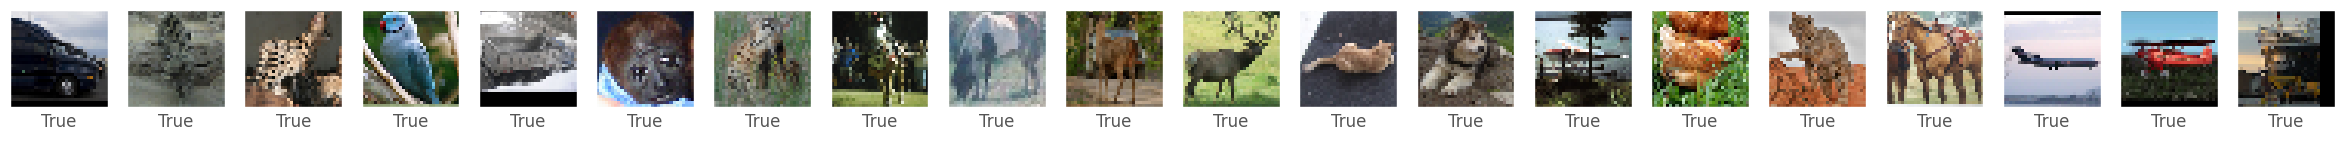

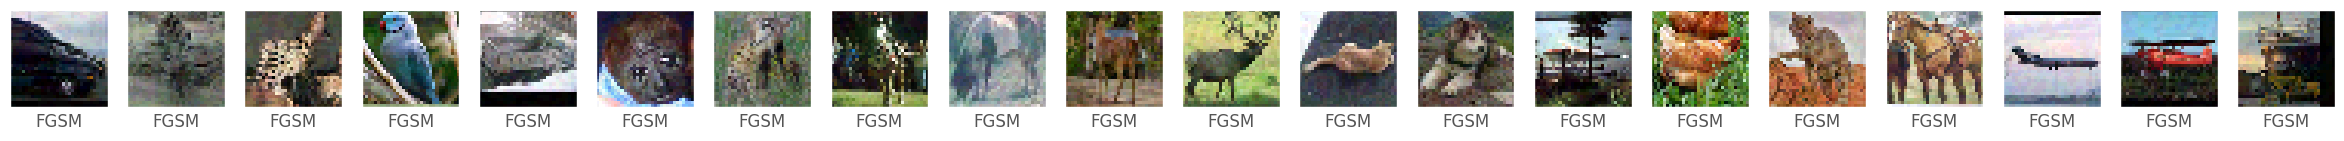

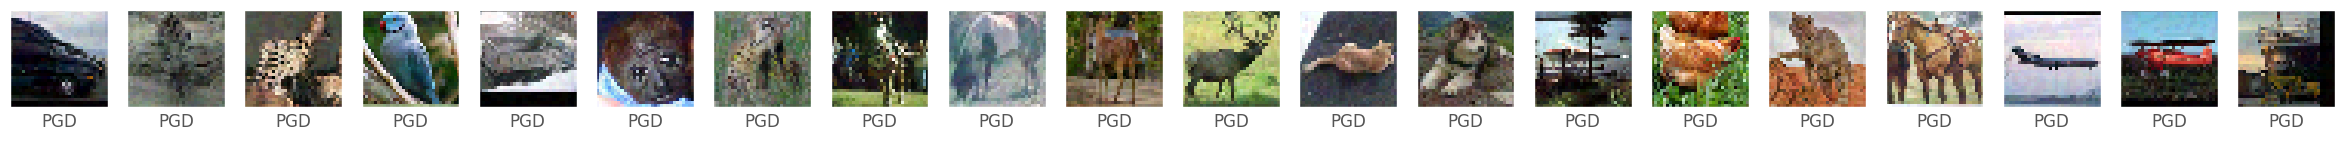

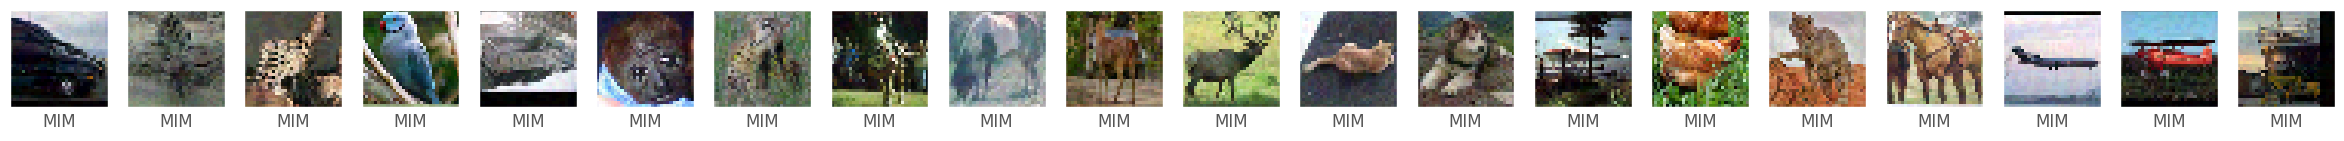

In [ ]:
# Perform respective attacks
x_attack_fgsm = fgsm_attack(model=with_data_aug, input_image=x_test, input_label=y_test, epsilon=epsilon, from_logits=False)
x_attack_pgd = pgd_attack(model=with_data_aug, input_image=x_test, input_label=y_test, epsilon=epsilon, num_steps=num_steps, step_size=step_size, from_logits=False)
x_attack_mim = mim_attack(model=with_data_aug, input_image=x_test, input_label=y_test, epsilon=epsilon, num_steps=num_steps, step_size=step_size, from_logits=False)

# Plot images of the images and their adversarial counterparts
plot_images(with_data_aug, x_test, y_test, data_manager.ds_info.features['label'].names, "True", 20)
plot_images(with_data_aug, x_attack_fgsm, y_test, data_manager.ds_info.features['label'].names, "FGSM", 20)
plot_images(with_data_aug, x_attack_pgd, y_test, data_manager.ds_info.features['label'].names, "PGD", 20)
plot_images(with_data_aug, x_attack_mim, y_test, data_manager.ds_info.features['label'].names, "MIM", 20)

In [ ]:
x_test_batch = with_data_aug.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
with_data_aug.compute_accuracy(x_test_batch)

250/250 [==============================] - 4s 15ms/step - loss: 1.7198 - accuracy: 0.5592
loss: 1.7197911739349365
accuracy: 0.559249997138977


In [ ]:
batch_set = tf.data.Dataset.from_tensor_slices((x_attack_fgsm, y_test))
x_test_batch = with_data_aug.optimize_data_pipeline(batch_set, batch_size=32)
with_data_aug.compute_accuracy(x_test_batch)

16/16 [==============================] - 0s 12ms/step - loss: 14.5853 - accuracy: 0.0180
loss: 14.585275650024414
accuracy: 0.017999999225139618


In [ ]:
with_data_aug.model.evaluate(x_attack_pgd, y_test)

16/16 [==============================] - 0s 9ms/step - loss: 13.3969 - accuracy: 0.0220


[13.396917343139648, 0.02199999988079071]

In [ ]:
with_data_aug.model.evaluate(x_attack_mim, y_test)

16/16 [==============================] - 0s 9ms/step - loss: 13.2586 - accuracy: 0.0220


[13.258578300476074, 0.02199999988079071]

### <span style="color:#0b486b">Question 3.9: Train a robust model</span>

Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
optimizer = tf.optimizers.SGD(learning_rate=best_learning_rate)
loss_obj = tf.nn.sparse_softmax_cross_entropy_with_logits

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

In [ ]:
def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:
        logits = with_data_aug.call(x)
        logits_adv = with_data_aug.call(x_adv)
        loss = (loss_obj(y, logits) + loss_obj(y, logits_adv))/2
        gradients = tape.gradient(loss, lenet_defence.trainable_variables)
        optimizer.apply_gradients(zip(gradients, lenet_defence.trainable_variables))
    return loss

In [ ]:
epochs = 5 # number of epochs
for epoch in range(epochs):
    # keras like display of progress
    progress_bar_train = tf.keras.utils.Progbar(60000, verbose=2)
    # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
    x_adv = pgd_attack(with_data_aug, x_attack_pgd, y_test, 0.0313, 10, 0.002, 0.0, 1.0)
    loss = train_step_adv(x_test, x_adv, y_test)
    y_pred = with_data_aug.call(x_test)
    test_acc_clean(y_test, y_pred)
    train_loss(loss)
    progress_bar_train.add(x_attack_pgd.shape[0], values=[('loss', train_loss.result()), ("acc (%)", test_acc_clean.result() * 100)])

In [ ]:
x_attack_pgd = pgd_attack(model=with_data_aug, input_image=x_test, input_label=y_test, epsilon=epsilon, num_steps=num_steps, step_size=step_size, from_logits=False)
with_data_aug.model.evaluate(x_attack_pgd, y_test)

The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try.

### <span style="color:#0b486b">Question 3.10</span> (bonus question)

Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this technique to the best obtained model and report the results. For the purpose of implementing SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


---
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**